In [2]:
# 1. 데이터에서 고객들이 결제하는 은행(Bank)를 확인하고자 한다. 
# 결제은행(Bank)항목에서 '신한카드'로 결제하는 고객들의 수를 확인하시오

import pandas as pd

df1 = pd.read_csv('data/01_Data.csv')
print(df1.shape)
df1.head(2)

(51301, 20)


,Unnamed: 0,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,State,Overdue_count,Overdue_Type,Gender,Bank,Credit_Score
0,0,1,66758234,렌탈,일반계약,영업방판,2022-05-09,60,CMS,SLX-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,새마을금고,496.0
1,1,2,66755948,렌탈,교체계약,영업방판,2023-02-23,60,카드이체,SLX-1,102900,개인,39.0,경기도,계약확정,0,없음,남자,현대카드,876.0


In [3]:
df1['Bank'].value_counts() # 범주형 항목의 빈도수를 내림차순으로 확인

Bank
롯데카드         9516
농협회원조합       6277
국민은행         6002
농협중앙회        3899
신한은행         3522
우리은행         3386
기업은행         1963
신한카드         1532
하나은행         1446
국민카드         1311
BC카드         1264
새마을금고         964
부산은행          889
삼성카드          884
현대카드          876
대구은행          746
우체국           718
외환은행          586
외환카드          530
경남은행          442
SC제일은행        439
광주은행          347
신협중앙회         341
전북은행          195
씨티은행          162
수협중앙회         160
제주은행           40
유안타증권          27
산업은행           23
현대증권           11
삼성증권            7
하나SK            6
미래에셋증권          5
신한금융투자          4
NH농협카드          4
한국투자증권          4
우리카드            3
대우증권            2
상호저축은행          1
대신증권            1
SK증권            1
하나대투증권          1
산림조합중앙회         1
수협카드            1
메리츠종합금융증권       1
하이투자증권          1
씨티카드            1
Name: count, dtype: int64

In [4]:
# 신한카드로 결제하는 계약 명단을 추출
cond1 = df1['Bank'] == "신한카드"
df1_card = df1.loc[cond1] # 특정 조건의 데이터를 추출
len(df1_card['Member_ID'].unique()) # 특정 범주형 항목의 고유값 확인

1297

In [6]:
# 신한 글자가 포함되어 잇는 모든 데이터를 추출

def func1(row):
    if pd.isnull(row):
        return False
    if '신한' in row:
        return True
    return False

cond1 = df1['Bank'].apply(func1)
df1.loc[cond1].head(2)

,Unnamed: 0,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,State,Overdue_count,Overdue_Type,Gender,Bank,Credit_Score
9,9,10,66756702,렌탈,프로모션계약,영업방판,2022-07-03,60,CMS,SLX-1,105900,개인,51.0,경상도,계약확정,0,없음,여자,신한은행,978.0
26,26,27,66422938,멤버십,멤버십3유형,재계약,2022-02-15,12,CMS,SLX-1,66900,개인,73.0,강원도,계약확정,0,없음,여자,신한은행,878.0


In [7]:
# 2. 월랜탈비용(Amount_Month)이 15만원 이상인 고객들 중 판매유형(Sales_Type)이 '렌탈'에 해당하는 고객만 추출하여,
# 해당 데이터의 행(index) 개수를 확인하시오.

cond1 = (df1['Amount_Month'] >= 150000) & (df1['Sales_Type'] == '렌탈')
df1.loc[cond1].shape[0]

141

In [10]:
# 각 고객의 평균 월 랜탈비용이 15만원 이상인 고객들을 확인
p1 = df1.pivot_table(index = 'Member_ID', values = 'Amount_Month', aggfunc = 'mean').reset_index()
cond1 = p1['Amount_Month'] >= 150000
vip_list = p1.loc[cond1]['Member_ID'].tolist() # 시리즈나 배열을 리스트로 변환
cond2 = df1['Member_ID'].isin(vip_list)
df1.loc[cond2]

,Unnamed: 0,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,State,Overdue_count,Overdue_Type,Gender,Bank,Credit_Score
328,328,329,25742694,렌탈,프로모션계약,대형마트E,2023-03-10,39,CMS,3DIR-AVD,185700,사업자,NaN,경기도,계약확정,0,없음,여자,기업은행,NaN
379,379,380,66758782,렌탈,프로모션계약,대형마트E,2022-01-09,39,CMS,3DIR-AVD,185700,개인,58.0,서울특별시,계약확정,0,없음,남자,기업은행,652.0
519,519,520,66758149,렌탈,프로모션계약,영업방판,2022-01-27,39,CMS,3DIR-AVD,185700,개인,52.0,경상도,계약확정,10,있음,남자,농협중앙회,624.0
727,727,728,66759077,렌탈,프로모션계약,영업방판,2022-12-24,39,CMS,3DIR-AVD,185700,개인,53.0,경기도,계약확정,1,있음,남자,농협회원조합,556.0
2279,2279,2280,66760726,렌탈,프로모션계약,대형마트E,2023-01-21,39,CMS,3DIR-AVD,185700,개인,69.0,서울특별시,계약확정,0,없음,남자,국민은행,883.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50381,50381,50383,66798387,렌탈,프로모션계약,영업방판,2022-02-27,39,카드이체,3DIR-AVD,185700,개인,37.0,경기도,계약확정,0,없음,남자,롯데카드,839.0
50464,50464,50466,66758303,렌탈,프로모션계약,대형마트A,2022-04-06,39,CMS,3DIR-AVD,185700,개인,53.0,서울특별시,계약확정,0,없음,남자,국민은행,966.0
50752,50752,50754,66798515,렌탈,프로모션계약,영업방판,2022-03-03,39,CMS,3DIR-AVD,185700,개인,37.0,서울특별시,계약확정,8,있음,남자,농협회원조합,667.0
50951,50951,50953,25736066,렌탈,프로모션계약,영업방판,2023-07-28,39,CMS,3DIR-AVD,185700,사업자,NaN,서울특별시,계약확정,8,있음,여자,신한은행,NaN


In [11]:
# 3. 계약일자(Datetime)에서 계약연도(Year)파생변수를 생성하고, 
# 연도 별, 각 제품군(Product_Type)의 월랜탈비용(Amount_Month) 합을 계산하시오.

df1['Date'] = pd.to_datetime(df1['Datetime'])
df1['Year'] = df1['Date'].dt.year
df1['Year'].value_counts()

Year
2022    40839
2023    10462
Name: count, dtype: int64

In [12]:
p2 = df1.pivot_table(index = 'Product_Type', columns = 'Year', values = 'Amount_Month', aggfunc = 'sum')
p2

Year,2022,2023
Product_Type,,
3DIR-AVD,17354400,5379600
ADV-5,33746400,8582100
ADVERA,62835600,14280000
SLX-1,2936751225,758364501
SLX-2,629260470,158396820
SLX-3,156786960,40298100


In [13]:
# 4. 22년 대비 23년 제품군(Product_Type)별 월랜탈비용(Amount_Month) 합의 증감율을 계산하시오.
# - 증감율 : ( (23년 월랜탈비용 총합) - (22년 월랜탈비용 총합) ) / (22년 월랜탈비용 총합)

p2['증감율'] = (p2[2023] - p2[2022]) / p2[2022]
p2

Year,2022,2023,증감율
Product_Type,,,
3DIR-AVD,17354400,5379600,-0.690015
ADV-5,33746400,8582100,-0.745688
ADVERA,62835600,14280000,-0.772740
SLX-1,2936751225,758364501,-0.741768
SLX-2,629260470,158396820,-0.748281
SLX-3,156786960,40298100,-0.742975


In [15]:
# 5. 22년도에 가장 많이 계약 된 제품과 23년도에 가장 많이 계약 된 제품의 각 월 별 계약 건수를 계산하시오.
df1['Month'] = df1['Date'].dt.month
df1['Count'] = 1 # 각 항목별 계약 건수의 합을 계산하기 위해 생성한 파생 변수
df1.pivot_table(index = 'Product_Type', columns = 'Year', values = 'Count', aggfunc = 'sum')
cond1 = df1['Product_Type'] == 'SLX-1'
df1.loc[cond1].pivot_table(index = 'Year', columns = 'Month', values = 'Count', aggfunc = 'sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2022,2053.0,5606.0,3835.0,2945.0,2352.0,2189.0,2175.0,2346.0,1886.0,2290.0,1286.0,2151.0
2023,1346.0,1497.0,1316.0,1122.0,752.0,519.0,1013.0,454.0,NaN,NaN,NaN,NaN


In [21]:
# 6. 판매 유형(Sales_Type)에서 '렌탈'계약과 '멤버십' 계약의 월랜탈비용(Amount_Month)의 평균의 차이를 계산하시오.

cond1 = df1['Sales_Type'] == '렌탈'
cond2 = df1['Sales_Type'] == '멤버십'
df1.loc[cond1]['Amount_Month'].mean() - df1.loc[cond2]['Amount_Month'].mean()

np.float64(34122.413318100276)

In [24]:
import plotly.express as px

p3 = df1.pivot_table(index = ['Sales_Type', 'Product_Type'], values = 'Amount_Month', aggfunc = 'mean').reset_index()
fig1 = px.bar(p3, x = 'Sales_Type', y = 'Amount_Month', color = 'Product_Type')
# 동적 시각화 자료를 HTML 파일로 저장
fig1.write_html('image.html', full_html = False, include_plotlyjs = 'cdn')

In [26]:
# 7. 월랜탈비용(Amount_Month)와 계약기간(Term)을 이용하여, 
# 한명의 고객이 계약금으로 총 지불하는 금액(Total_Amount)을 계산하고, 
# 해당 데이터에서 ‘Target’이라는 파생 변수를 생성해 상위 25% 계약을 ‘A’, 나머지를 ‘B’로 파생변수를 생성하시오. 

df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']
cond1 = df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.75)
df1['Target'] = 'B' # target 변수를 생성해 B값으로 모두 채워 넣음
df1.loc[cond1, 'Target'] = 'A'
df1['Target'].value_counts()

Target
A    30392
B    20909
Name: count, dtype: int64

In [27]:
df1.loc[~cond1, 'Target'] = 'B' # 조건에 반대되는 모든 데이터를 추출

In [28]:
# 8. ‘Target’값에 따라 고객의 신용 점수의 평균 차이를 계산하시오.

df1.pivot_table(index = 'Target', values = 'Credit_Score', aggfunc = 'mean')

,Credit_Score
Target,
A,831.670305
B,819.398194


In [31]:
# 9. ‘Target’값 중 A 그룹에 대해, 각 제품(Product_Type)이 몇 % 차지하고 있는지 각각 비율을 계산하시오. 

cond1 = df1['Target'] == 'A'
df1_A = df1.loc[cond1]
df1_A['Product_Type'].value_counts() / len(df1_A)

Product_Type
SLX-1       0.944953
SLX-3       0.023526
SLX-2       0.017044
ADV-5       0.010529
3DIR-AVD    0.003948
Name: count, dtype: float64

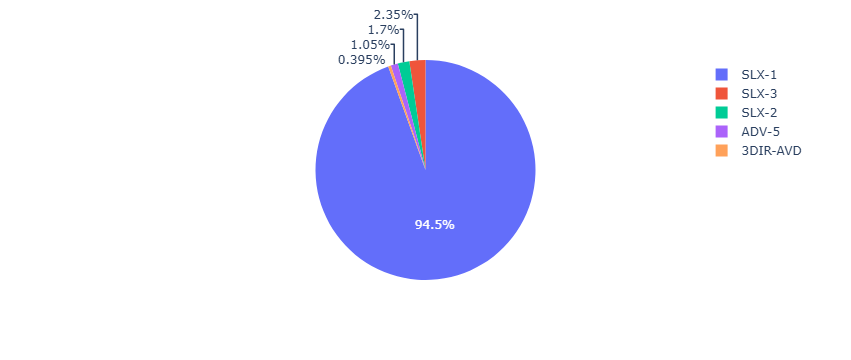

In [32]:
# 해당 제품군의 비율을 Pie Chart로 시각화
s1 = df1_A['Product_Type'].value_counts()
px.pie(s1, names = s1.index, values = s1.values)

In [34]:
# 10. ‘Target’값 중 B 그룹에 대해, 가장 비율이 적은 제품군(Product_Type)을 확인하고,
# 해당 제품의 일 별 총 계약금액(Total_Amount)의 합을 계산하시오. 

cond1 = df1['Target'] == 'B'
p1 = df1.loc[cond1]['Product_Type'].value_counts() / len(df1.loc[cond1])
cond2 = df1['Product_Type'] == 'ADV-5'
df1.loc[cond1 & cond2].pivot_table(index = 'Date', values = 'Total_Amount', aggfunc = 'sum')

,Total_Amount
Date,
2022-02-03,910800
2022-02-11,910800
2022-03-20,910800
2022-06-24,910800
2022-08-02,910800
2022-12-01,910800
2022-12-18,910800


In [35]:
# 11. 계약 데이터를 주기적으로 정리하는 업무자동화 프로그램을 만들고자 한다. 
# 데이터에서 주차(Work Week)를 입력 해, 해당 주차의 제품 군(Product_Type)별 월랜탈비용(Amount_Month)의 합과 평균을 
# 엑셀로 출력하는 함수를 생성하시오.
# - 파일이 저장 될 때, 아래와 같은 이름으로 저장 되어야 합니다.
# - 1주차 입력시 -> '1week_Product_Contract.xlsx'
# - 3주차 입력시 -> '3week_Product_Contract.xlsx'

def func1():
    work_week = input()
    cond1 = df1['Week'] == int(work_week)
    df2 = df1.loc[cond1]
    df3 = df2.pivot_table(index = 'Product_Type', values = 'Amount_Month', aggfunc = ['mean', 'sum'])
    print(work_week + 'week_Product_Contract.xlsx')
    
df1['Week'] = df1['Date'].dt.isocalendar().week
func1()

 20


20week_Product_Contract.xlsx


In [37]:
# 12. 03_Data.csv 데이터를 df3로 선언해, '총구매금액'이 높은 상위 100명의 고객 명단을 추출하여,
# result_member_vip.xlsx로 저장 하시오.

df3 = pd.read_csv("../hanro_test/0404/03_Data.csv")
df3.sort_values(by = '총구매금액', ascending = False).head(100)

,Unnamed: 0,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
133,133,2249,정상회원,여,NaN,경기 용인시 수지구 풍덕천2,47,22346350,4373.60,174
156,156,2277,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,47,21950630,4425.70,170
2857,2857,5068,탈퇴,여,기혼,경기 용인시 수지구 동천동,47,21285710,4180.50,170
3645,3645,5856,탈퇴,여,기혼,경기 용인시 수지구 신봉동,46,21217470,4006.96,172
327,327,2472,정상회원,여,미혼,경기 용인시 수지구 풍덕천2,44,20191005,4044.20,167
...,...,...,...,...,...,...,...,...,...,...
38,38,2140,정상회원,여,기혼,경기 용인시 수지구 풍덕천1,53,7708970,1157.20,113
375,375,2524,정상회원,여,미혼,경기 용인시 수지구 풍덕천1,46,7703060,1745.50,147
311,311,2453,정상회원,여,미혼,경기 용인시 수지구 상현2동,41,7663730,1566.50,146
3866,3866,6078,탈퇴,여,기혼,경기 용인시 수지구 신봉동,39,7644660,1651.84,132


In [39]:
# 13. 회원 '성별'에 따른 '총구매금액'의 합을 비교하고자 한다. 
# '성별' 별 '총구매금액'의 합/평균을 Table로 계산하고, 두 집단의 평균과 합을 막대그래프로 시각화 하여 비교하시오.

p1 = df3.pivot_table(index = '성별', values = '총구매금액', aggfunc = ['mean', 'sum']).reset_index()
p1.columns = ['성별', '총구매금액합', '총구매금액평균']
p1

,성별,총구매금액합,총구매금액평균
0,남,4.834805e+05,250926387
1,여,1.042474e+06,3925957601


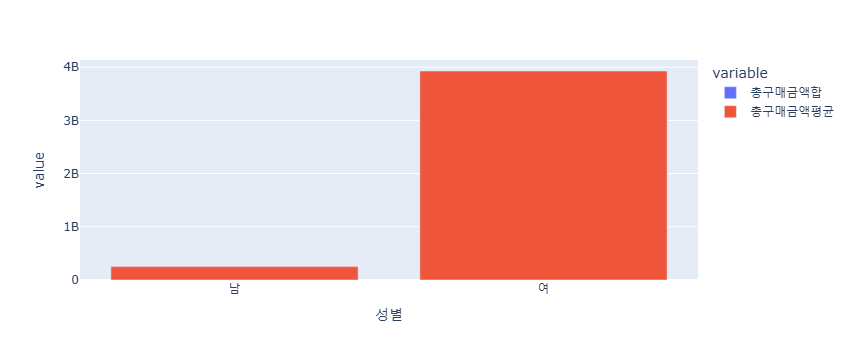

In [43]:
p2 = p1.melt(id_vars = '성별')
px.bar(p2, x = '성별', y = 'value', color = 'variable')

In [45]:
# 14. '결혼유무'에서 '기혼'에 해당하는 고객들 중 '총방문횟수'가 높은 상위 30명의 고객명단을 확인 하시오.

cond1 = df3['결혼유무'] == '기혼'
df3.loc[cond1].sort_values(by = '총방문횟수', ascending = False).head(30)

,Unnamed: 0,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
39,39,2141,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,50,15302800,2896.70,173
3645,3645,5856,탈퇴,여,기혼,경기 용인시 수지구 신봉동,46,21217470,4006.96,172
2441,2441,4649,탈퇴,여,기혼,경기 용인시 수지구 풍덕천2,46,16471290,3447.20,171
1928,1928,4135,탈퇴,여,기혼,경기 용인시 수지구 신봉동,49,18381620,3219.43,170
156,156,2277,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,47,21950630,4425.70,170
2857,2857,5068,탈퇴,여,기혼,경기 용인시 수지구 동천동,47,21285710,4180.50,170
142,142,2260,정상회원,여,기혼,경기 용인시 수지구 풍덕천동,41,18681595,3870.15,169
166,166,2288,정상회원,여,기혼,경기 용인시 수지구 풍덕천동,50,17170370,2921.50,166
103,103,2214,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,42,14895300,2986.40,162
372,372,2521,정상회원,여,기혼,경기 용인시 수지구 신봉동,44,13609730,2985.55,161


In [49]:
# 15. '연령'을 이용해, 고객 '연령대'를 계산하고, '총구매금액'의 합이 가장 높은 2개의 '연령대'를 확인하여, 
# 두 연령대 간의 '총구매금액'의 평균의 차이를 계산 하시오.

def func1(row):
    if pd.isnull(row):
        return row
    if row >= 90:
        return '90대 이상'
    else:
        return str(row)[0] + '0대'
    
df3['연령대'] = df3['연령'].apply(func1)
p2 = df3.pivot_table(index = '연령대', values = '총구매금액', aggfunc = 'sum').sort_values(by = '총구매금액', ascending = False)
cond1 = df3['연령대'] == p2.index[0]
cond2 = df3['연령대'] == p2.index[1]
df3.loc[cond1]['총구매금액'].mean() - df3.loc[cond2]['총구매금액'].mean()

np.float64(195511.71931750863)

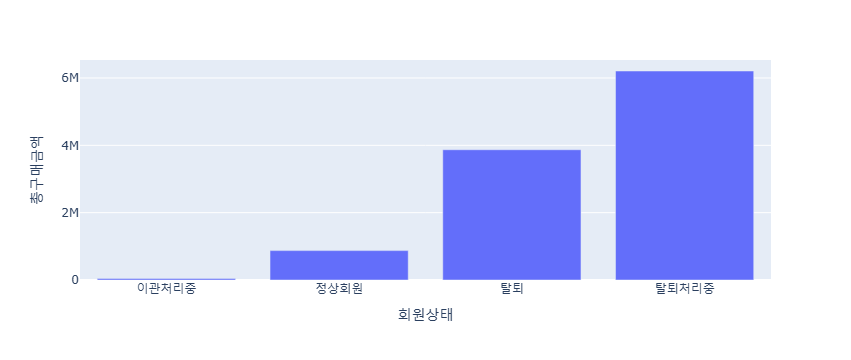

In [54]:
# 16. 전체 고객의 '회원상태'의 각 비율을 계산하고, 회원 상태에 따른 '총구매금액'의 평균을 시각화 하시오.

df3['회원상태'].value_counts() / len(df3)
p1 = df3.pivot_table(index = '회원상태', values = '총구매금액', aggfunc = 'mean').reset_index()
px.bar(p1, x = '회원상태', y = '총구매금액')

 - **시간 데이터 전처리 (보간법)**
 - 날짜 시간 데이터 기준으로 병합 시, 시점이 서로 다른 데이터를 병합해야 할 때
 - 제조 공정 데이터에서 발생한 품질 데이터(Detetion)와 공정 데이터(Process)를 합쳐, 어떤 인자가 품질 불량에 영향이 있는지 분석
 - 해당 데이터는 플라스틱을 제조하는 공장에서 발생한 제조공정 데이터
 - 품질 데이터 (Detection)는 4시간 마다 측정된 데이터
 - 공정 데이터 (Process)는 10분마다 설비에서 나오는 데이터
 - 품질 데이터를 기준으로 병합할 것인지, 공정데이터를 기준으로 병합할 것인지

In [55]:
df_detect = pd.read_csv('data/05_Detection.csv')
df_process = pd.read_csv('data/05_Process_A.csv')

In [61]:
print(df_detect.shape)
df_detect.tail(2)

(474, 10)


,Unnamed: 0,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime,datetime_1h
472,472,2019-09-03 23:30:00.000,NE282PV,1701,Total [1/m²],15553.431,1237.614,980.762,2019-09-03 23:30:00,2019-09-04 00:00:00
473,473,2019-09-04 03:30:00.000,NE282PV,1701,Total [1/m²],17484.660,1599.893,1170.407,2019-09-04 03:30:00,2019-09-04 04:00:00


In [63]:
print(df_process.shape)
df_process.tail(2)

(10656, 10)


,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6,datetime
10654,2019-09-03T23:50:00,P3,AVG,229.162736,230.555417,231.024972,230.583142,229.613431,227.703735,2019-09-03 23:50:00
10655,2019-09-04T00:00:00,P3,AVG,229.358859,230.736761,231.046182,230.749156,229.625037,227.722858,2019-09-04 00:00:00


In [58]:
# 날짜 데이터를 기준으로 병합 (key columns) -> merge
# 날짜 형식의 자료로 변환

df_detect['datetime'] = pd.to_datetime(df_detect['date_clean'])
df_process['datetime'] = pd.to_datetime(df_process['DATE'])

In [72]:
# 품질검사 데이터를 기준으로 병합 -> 4시간 단위로 병합
# 실제로 4시간 단위로 데이터가 붙지 않음 -> 품질검사 데이터 시간이 마이크로 초 단위로 붙어있음
# 품질 데이터의 초 값을 시간 단위로 반올림하여 병합
# 시간, 날짜에 대한 반올림
df_detect['datetime_1h'] = df_detect['datetime'].dt.round('1h')
pd.merge(df_detect, df_process, left_on = 'datetime_1h', right_on = 'datetime', how = 'inner').head(2)
# 병합한 시점에 정확한 데이터가 오지 않는 경우가 발생할 수 있다.

,Unnamed: 0,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime_x,datetime_1h,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6,datetime_y
0,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 04:00:00,2018-12-01T04:00:00,P1,AVG,224.648534,227.539941,229.864964,229.906252,230.974404,229.545407,2018-12-01 04:00:00
1,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 08:00:00,2018-12-01T08:00:00,P1,AVG,226.571822,229.058791,230.989369,231.486422,232.178278,230.352623,2018-12-01 08:00:00


In [76]:
# 10분 단위로 수집된 공정 데이터를 1시간 단위로 계산하여 병합

p1 = df_process[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'datetime']].set_index('datetime')
p1.resample('1h').median()

,A1,A2,A3,A4,A5,A6
datetime,,,,,,
2018-12-01 00:00:00,225.637279,228.040479,230.276102,230.359142,231.650512,230.317974
2018-12-01 01:00:00,223.936385,226.488633,228.767494,228.807238,230.050080,228.719206
2018-12-01 02:00:00,223.842846,226.518009,228.757325,228.788199,230.039800,228.696355
2018-12-01 03:00:00,224.662476,227.427117,229.737463,229.688381,230.932909,229.467420
2018-12-01 04:00:00,224.705124,227.272213,229.867947,229.658412,231.027643,229.522117
...,...,...,...,...,...,...
2019-09-03 20:00:00,228.749773,230.135942,230.494286,230.311337,229.160959,227.255669
2019-09-03 21:00:00,229.325066,230.633823,230.984505,230.667460,229.493424,227.578229
2019-09-03 22:00:00,229.340633,230.663575,231.011006,230.718747,229.569927,227.631564


In [78]:
p2 = p1.resample('1h').median().reset_index()
df2 = pd.merge(df_detect, p2, left_on = 'datetime_1h',right_on = 'datetime', how = 'inner')
df2.shape

(473, 17)

In [81]:
# 공정 데이터 (10분 단위)를 기준으로 병합

df3 = pd.merge(df_detect, df_process, left_on = 'datetime_1h', right_on = 'datetime', how = 'outer')

In [83]:
s1 = df3.tail(20)['Y1A']

In [87]:
# 결측값 윗쪽에 있는 실측값을 아래로 채워 결측값을 처리

s1.fillna(method = 'bfill') # ffill : forward fill 위에있는 값으로 채움, bfill : backward fill 아래 있는 값으로 채움

C:\Users\leedo\AppData\Local\Temp\ipykernel_20460\3813386054.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



10668    15553.431
10669    15553.431
10670    15553.431
10671    15553.431
10672    15553.431
10673    15553.431
10674    15553.431
10675    15553.431
10676    15553.431
10677    15553.431
10678    15553.431
10679    15553.431
10680    15553.431
10681    15553.431
10682    15553.431
10683    15553.431
10684    15553.431
10685    15553.431
10686    15553.431
10687    17484.660
Name: Y1A, dtype: float64

In [88]:
# 선형보간법 : 데이터 사이의 비어있는 간격 만큼 데이터를 순차적으로 비례하게 증감시켜 결측값을 처리

s1.interpolate(method = 'linear')

10668          NaN
10669          NaN
10670          NaN
10671          NaN
10672          NaN
10673          NaN
10674          NaN
10675          NaN
10676          NaN
10677          NaN
10678          NaN
10679          NaN
10680          NaN
10681          NaN
10682          NaN
10683          NaN
10684          NaN
10685          NaN
10686    15553.431
10687    17484.660
Name: Y1A, dtype: float64